In [2]:
import numpy as np  # For vectorized math operations
from scipy.stats import gumbel_r, logistic
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd

In [3]:
%config InlineBackend.figure_format='retina'

sns.set_theme(
    context="notebook",
    style="white",
    font="Latin Modern Roman",
    rc={
        "axes.spines.right": False,
        "axes.spines.top": False,
        "text.usetex": True,
    },
)

extra_params = {
    "text.latex.preamble": " ".join([r"\usepackage{mathtools}", r"\usepackage{amssymb}"])
}

plt.rcParams.update(extra_params)

In [4]:
N = 999
J = 4

## Multinomial Logit

In [8]:
np.random.seed(1234)
η = np.random.gumbel(0, 1, (N, J))
u = np.ones((N, 1)) @ np.random.normal(0, 5, (1, J))

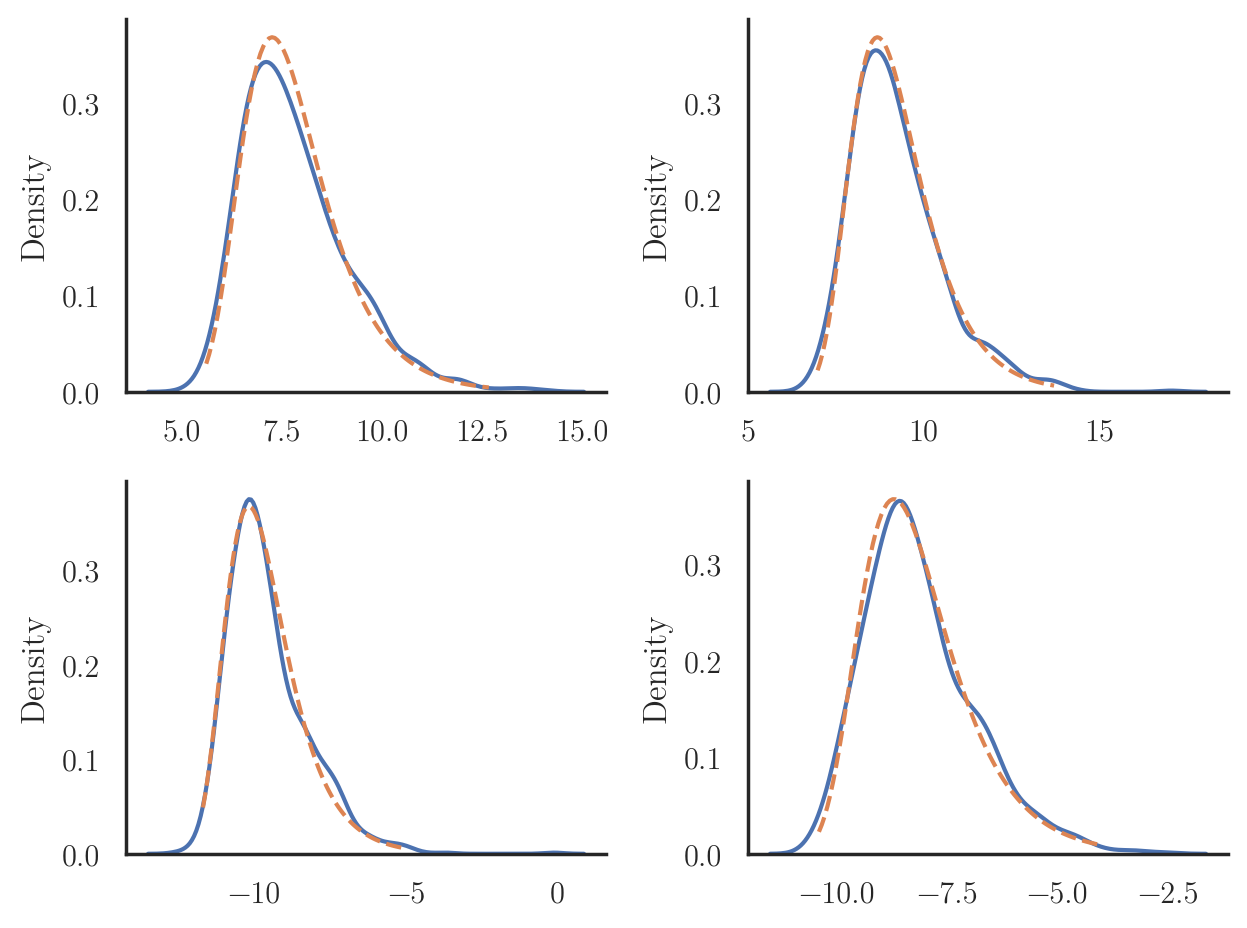

In [9]:
fig, axs = plt.subplots(2, 2)
for i in range(J):
    plt.sca(axs.reshape(-1)[i])
    sns.kdeplot((u + η)[:, i])
    sns.lineplot(
        **dict(
            zip(
                ["x", "y"],
                list(
                    zip(
                        *(
                            (x, gumbel_r.pdf(x, u[0, i]))
                            for x in np.linspace(
                                *np.percentile((u + η)[:, i], [0.5, 99.5]), 100
                            )
                        )
                    )
                ),
            )
        ),
        linestyle="dashed"
    )
    # plt.axvline(x = df["product_features"][i, :] @ df["latent_β_prod"][:, 0], color="black", drawstyle="steps-pre", linestyle="dashed", zorder=-1)
fig.tight_layout()
plt.show()

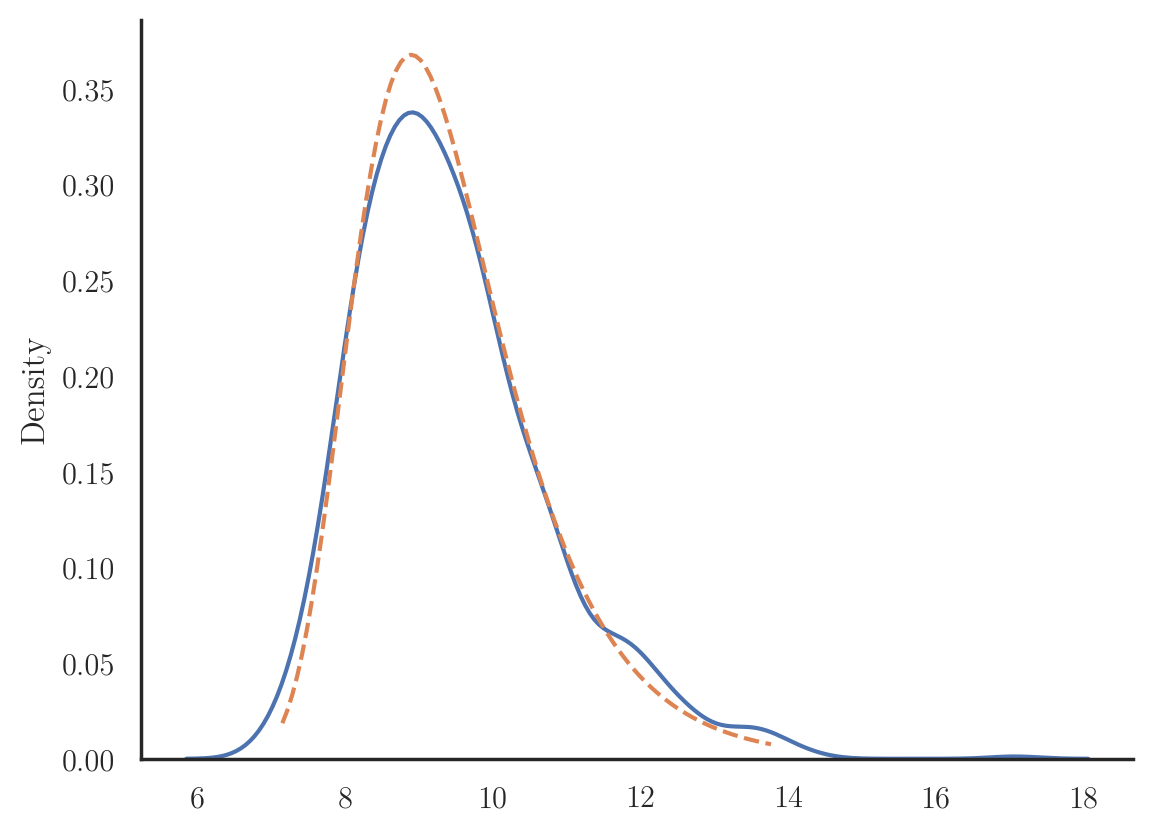

In [10]:
# you can see that small samples of the Gumbell always look a bit off
mu_bar = np.log(np.sum(np.exp(u[0, :])))
sns.kdeplot(np.max(u + η, axis=1))
sns.lineplot(
    **dict(
        zip(
            ["x", "y"],
            list(
                zip(
                    *(
                        (x, gumbel_r.pdf(x, mu_bar))
                        for x in np.linspace(
                            *np.percentile(np.max(u + η, axis=1), [0.5, 99.5]), 100
                        )
                    )
                )
            ),
        )
    ),
    linestyle="dashed"
)
plt.show()

### Difference of Gumbels is Logistic

In [5]:
np.random.seed(1234)
η = np.random.gumbel(0, 1, (N, 2))

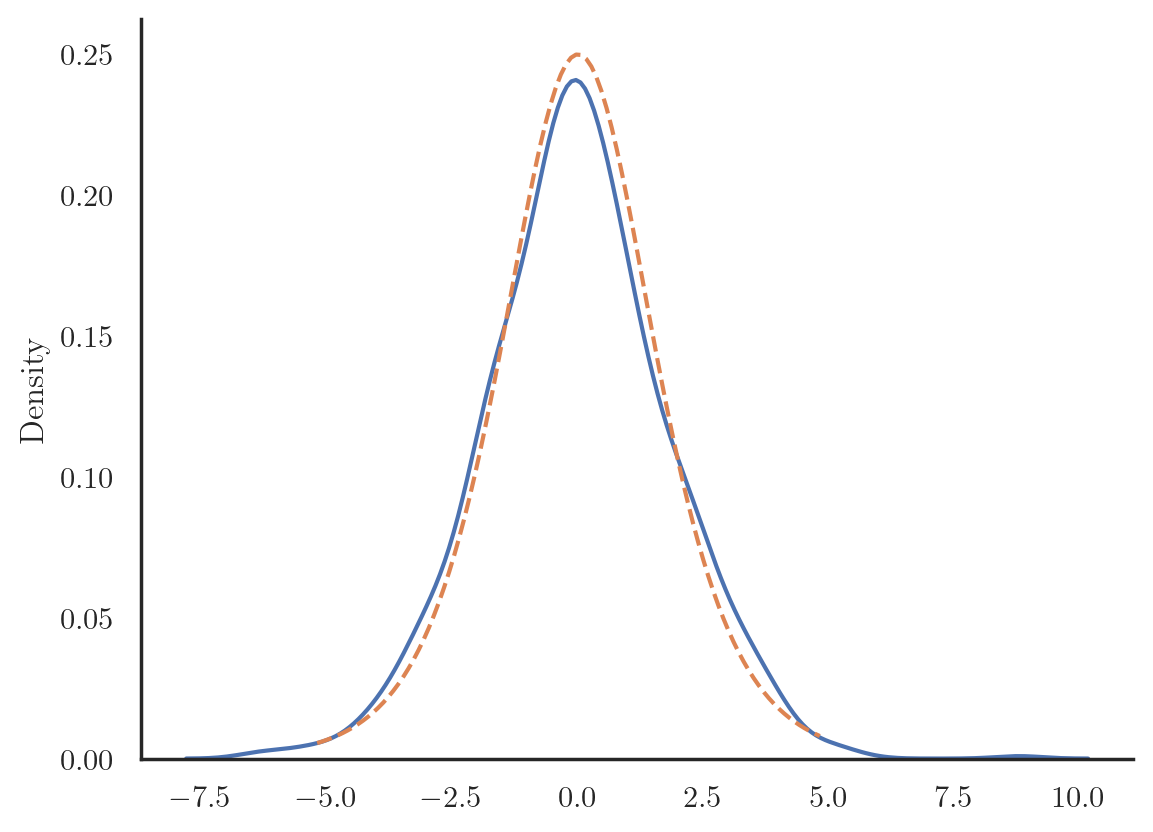

In [6]:
sns.kdeplot(np.diff(η, axis=1), legend=False)
sns.lineplot(
    **dict(
        zip(
            ["x", "y"],
            list(
                zip(
                    *(
                        (x, logistic.pdf(x, 0))
                        for x in np.linspace(
                            *np.percentile(np.diff(η, axis=1), [0.5, 99.5]), 100
                        )
                    )
                )
            ),
        )
    ),
    linestyle="dashed"
)
plt.show()

In [11]:
df = pd.DataFrame(η)
df[2] = df[0] - df[1]
df[3] = np.digitize(df[1], gumbel_r.ppf(np.linspace(0, 1, 5)))
df.columns = ["η0", "η1", "Δη", "group"]

In [17]:
sns.color_palette()

[(0.2980392156862745, 0.4470588235294118, 0.6901960784313725),
 (0.8666666666666667, 0.5176470588235295, 0.3215686274509804),
 (0.3333333333333333, 0.6588235294117647, 0.40784313725490196),
 (0.7686274509803922, 0.3058823529411765, 0.3215686274509804),
 (0.5058823529411764, 0.4470588235294118, 0.7019607843137254),
 (0.5764705882352941, 0.47058823529411764, 0.3764705882352941),
 (0.8549019607843137, 0.5450980392156862, 0.7647058823529411),
 (0.5490196078431373, 0.5490196078431373, 0.5490196078431373),
 (0.8, 0.7254901960784313, 0.4549019607843137),
 (0.39215686274509803, 0.7098039215686275, 0.803921568627451)]

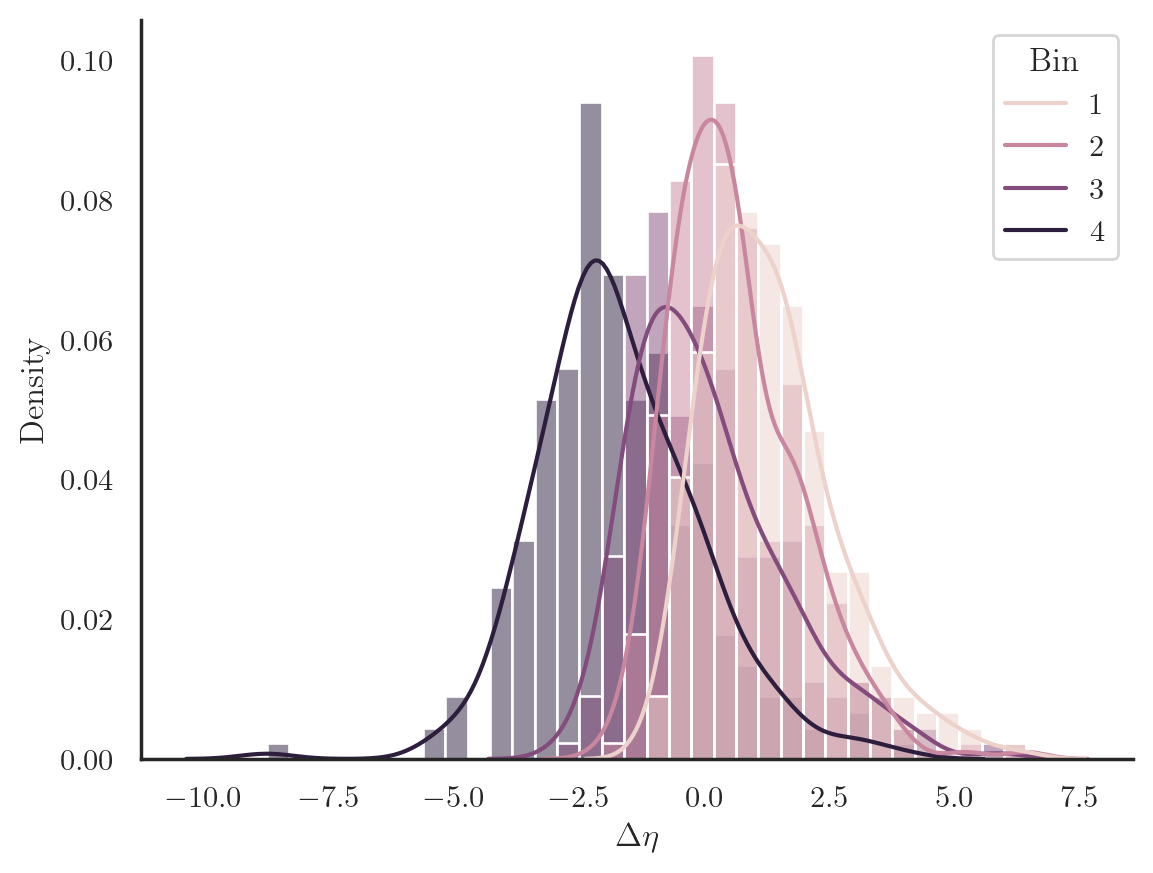

In [21]:
sns.histplot(data = df, x = "Δη", hue = "group", stat="density")
sns.kdeplot(data = df, x = "Δη", hue = "group")
plt.xlabel(r"$\Delta\eta$")
plt.gca().get_legend().set_title(title="Bin")
plt.show()